In [1]:
from IPython.core.display import display, HTML
display(HTML("<style>.container { width:100% !important; }</style>"))

In [2]:
%load_ext autoreload
%autoreload 2
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from collections import Counter
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
import scikitplot as skplt
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.model_selection import GridSearchCV
from imblearn.over_sampling import SMOTE
import util

% matplotlib inline
plt.style.use("ggplot")

### Exploratory Data Analysis

In [3]:
#Loading data 
df = pd.read_csv("data/exercise_01_train.csv")

In [4]:
df.head()

,x0,x1,x2,x3,x4,x5,x6,x7,x8,x9,...,x91,x92,x93,x94,x95,x96,x97,x98,x99,y
0,10.142889,-15.675620,3.583176,-22.397489,27.221894,-34.110924,-0.072829,-0.544444,0.997601,-2.691778,...,1.916575,5.240820,euorpe,2.431170,0.454074,-18.572032,-14.291524,0.178579,18.110170,0
1,-52.214630,5.847135,-10.902843,-14.132351,20.588574,36.107322,0.115023,0.276093,-0.699168,-0.972708,...,0.370941,-3.794542,asia,2.592326,31.921833,3.317139,10.037003,-1.930870,-3.486898,0
2,67.718500,2.064334,12.394186,-18.667102,47.465504,-50.373658,0.253707,1.068968,2.939713,2.691218,...,1.449817,12.470532,asia,7.143821,9.401490,-10.604968,7.643215,-0.842198,-79.358236,0
3,-28.003111,8.565128,-8.592092,5.918960,-3.224154,78.315783,-0.879845,1.176889,-2.414752,0.589646,...,-3.274733,3.484450,asia,-4.998195,-20.312810,14.818524,-9.180674,1.356972,14.475681,0
4,80.703016,30.736353,-30.101857,-21.201140,-91.946233,-47.469246,-0.646831,-0.578398,0.980849,-1.426112,...,-0.644261,4.082783,asia,-0.012556,-29.334324,1.734433,-12.262072,-0.043228,-19.003881,0


In [5]:
df.tail()

,x0,x1,x2,x3,x4,x5,x6,x7,x8,x9,...,x91,x92,x93,x94,x95,x96,x97,x98,x99,y
39995,20.844737,-33.785846,-0.346804,-3.406866,34.771517,-57.951056,-0.288205,1.371940,3.335447,1.765670,...,-2.985304,7.312132,asia,5.964857,-13.061671,-8.062604,16.618593,-3.609543,0.631066,0
39996,1.666154,16.241028,12.623090,-6.168540,-10.650748,69.840299,-0.965011,-4.321631,3.071324,-0.209940,...,-5.842786,3.563600,asia,4.895863,-1.342384,-10.275539,14.046990,-0.320440,46.051387,0
39997,1.795836,-15.706685,1.009672,-0.887671,-11.580529,3.237055,0.541397,2.562310,-0.623586,3.300388,...,7.503255,-11.064043,america,6.783607,15.293008,-6.194035,-4.725605,-1.321478,27.836630,0
39998,50.168318,-4.272643,2.409248,-11.697615,39.234827,31.353302,1.416008,1.825775,2.027886,-3.753114,...,-1.411384,-17.587621,america,6.278226,-18.743967,-8.067506,5.258203,-2.623772,-15.550075,0
39999,-8.653274,10.572796,1.377445,-21.472814,-42.686853,28.893360,3.379456,-1.241659,-0.040278,0.612898,...,7.622624,-6.473851,asia,0.055730,-6.506186,12.434701,-6.001283,-5.340633,18.276723,1


In [6]:
print("Number of columns: {} \nNumber of rows: {}".format(df.shape[1], df.shape[0]))

Number of columns: 101 
Number of rows: 40000


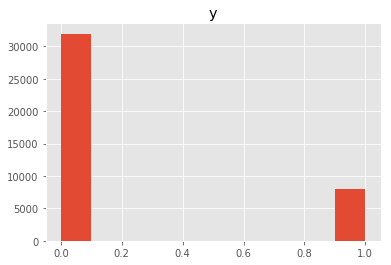

In [7]:
# Lets see the distribution of the label
df.hist(column="y")
plt.show()

In [8]:
y_dict = Counter(df["y"])
print("The minority class make up {}% of the data"
      .format(round(y_dict[1]/df.shape[0] *100)))

print("The majority class make up {}% of the data"
      .format(round(y_dict[0]/df.shape[0] *100)))

The minority class make up 20% of the data
The majority class make up 80% of the data


In [9]:
# This show the data is imbalanced and skewed towards the negative class

In [10]:
categorical_cols = util.non_numerical_col(df)

In [11]:
# Taking a look at the contents of categorical features
for col in categorical_cols:
    print(pd.unique(df[col]), "\n")

['bmw' 'nissan' 'Honda' 'Toyota' 'volkswagon' 'tesla' 'chrystler' 'ford'
 'mercades' nan 'chevrolet'] 

['wed' 'thur' 'thurday' 'wednesday' 'friday' 'tuesday' 'monday' 'fri' nan] 

['$-54.1' '$-229.32' '$243.68' ... '$1215.91' '$-723.78' '$-426.49'] 

['0.0%' '0.01%' '-0.01%' '0.02%' '-0.02%' '-0.0%' '-0.03%' '0.03%' '0.04%'
 '-0.04%' nan] 

['Jun' 'July' 'May' 'Aug' 'Apr' 'Mar' 'Oct' 'sept.' 'Nov' 'Feb' 'Dev' nan
 'January'] 

['euorpe' 'asia' 'america' nan] 



In [12]:
# Looking into the features, these contain type of cars, days of the week, 
# dollar amount, percentage, month of the year, continent. Lets change the the dollar amount 
# and the percentage attributes to numerical values

In [13]:
util.regex(df, ["x41","x45"])

In [14]:
type(df["x45"][0])

numpy.float64

In [15]:
# Since there are few unique values in "x34", "x35", "x68" and "x93" it is a good idea to turn 
# them into dummy variables. But before doing that, observe that there are nan values. 
# Lets also see how much of the data is nan 

In [16]:
region = Counter(df["x93"])
cars = Counter(df["x34"])
days = Counter(df["x35"])
month = Counter(df["x68"])

In [17]:
print(region,"\n\n", cars,"\n\n", days,"\n\n", month)

Counter({'asia': 35409, 'america': 3136, 'euorpe': 1448, nan: 7}) 

 Counter({'volkswagon': 12572, 'Toyota': 10946, 'bmw': 7304, 'Honda': 5129, 'tesla': 2275, 'chrystler': 1223, 'nissan': 336, 'ford': 165, 'mercades': 32, 'chevrolet': 11, nan: 7}) 

 Counter({'wed': 14834, 'thurday': 13359, 'wednesday': 5891, 'thur': 4374, 'tuesday': 929, 'friday': 526, 'monday': 56, 'fri': 21, nan: 10}) 

 Counter({'July': 11088, 'Jun': 9279, 'Aug': 8155, 'May': 4788, 'sept.': 3466, 'Apr': 1641, 'Oct': 926, 'Mar': 409, 'Nov': 156, 'Feb': 54, 'Dev': 18, 'January': 11, nan: 9})


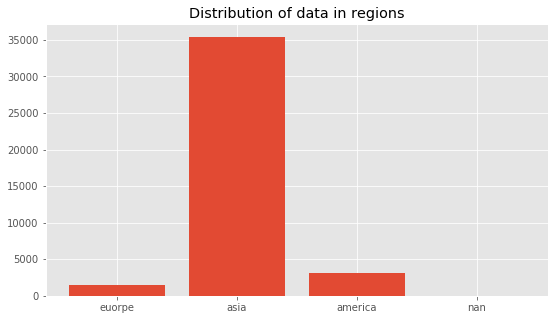

In [18]:
util.plot_cols(region, "regions")

In [19]:
print(region, "\n")
print("{}% of the data belong to asia category \n"
      .format(round(region["asia"]/sum(region.values())*100, 2)))
print("{}% of the data belong to asia category"
      .format(round(region["nan"]/sum(region.values())*100, 9)))

Counter({'asia': 35409, 'america': 3136, 'euorpe': 1448, nan: 7}) 

88.52% of the data belong to asia category 

0.0% of the data belong to asia category


In [20]:
# Doing the same for the other features

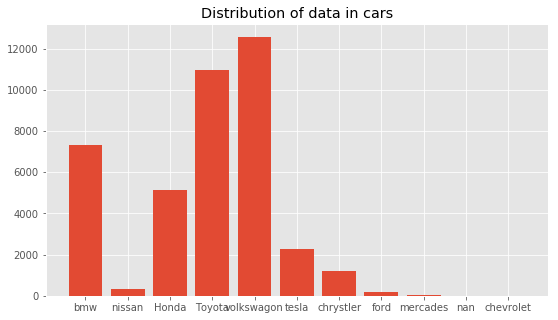

In [21]:
util.plot_cols(cars, "cars")

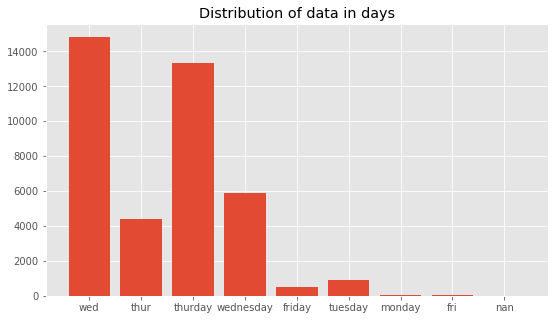

In [22]:
util.plot_cols(days, "days")

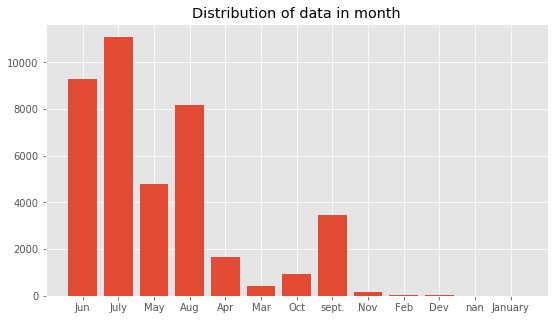

In [23]:
util.plot_cols(month, "month")

In [24]:
# Notice that in two of the plots, month and days there are duplicates in categories, 
# there are double entries of the month of january (as jun and January) and double entries 
# for wednesday/fiday as (wed and wednesday also fri and friday) as well as misspelling in thursday. 
# These categories will be merged as a single unique category. There are also mixed naming formats 
# used in days attribute (ie short and full) these will be changed for uniformity 

In [25]:
util.retructure_cols(df)

In [26]:
pd.unique(df["x35"])

array(['wed', 'thur', 'fri', 'tue', 'mon', nan], dtype=object)

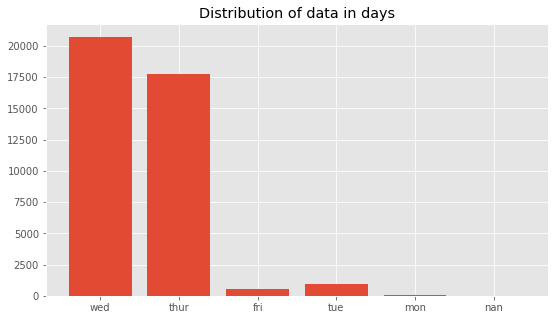

In [27]:
# After merging duplicates
util.plot_cols(Counter(df["x35"]), "days")

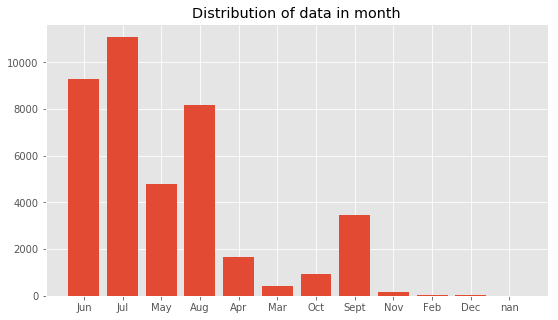

In [28]:
util.plot_cols(Counter(df["x68"]), "month")

In [29]:
# Now we can make these categorical attributs into one-in-hot encoding

In [30]:
df_dummy = pd.get_dummies(df, prefix=["x34","x35","x68","x93"])

In [31]:
df_dummy.head()

,x0,x1,x2,x3,x4,x5,x6,x7,x8,x9,...,x68_Jul,x68_Jun,x68_Mar,x68_May,x68_Nov,x68_Oct,x68_Sept,x93_america,x93_asia,x93_euorpe
0,10.142889,-15.675620,3.583176,-22.397489,27.221894,-34.110924,-0.072829,-0.544444,0.997601,-2.691778,...,0,1,0,0,0,0,0,0,0,1
1,-52.214630,5.847135,-10.902843,-14.132351,20.588574,36.107322,0.115023,0.276093,-0.699168,-0.972708,...,1,0,0,0,0,0,0,0,1,0
2,67.718500,2.064334,12.394186,-18.667102,47.465504,-50.373658,0.253707,1.068968,2.939713,2.691218,...,1,0,0,0,0,0,0,0,1,0
3,-28.003111,8.565128,-8.592092,5.918960,-3.224154,78.315783,-0.879845,1.176889,-2.414752,0.589646,...,0,0,0,1,0,0,0,0,1,0
4,80.703016,30.736353,-30.101857,-21.201140,-91.946233,-47.469246,-0.646831,-0.578398,0.980849,-1.426112,...,1,0,0,0,0,0,0,0,1,0


In [32]:
df_dummy.shape

(40000, 126)

In [33]:
# Creating one-in-hot encoding have added 25 more features to the data
# Now the entire data is numerical, we can determine what subset from the feature will be relevant to a good model
# We can start by checking how much each feature correlates with the the label

In [34]:
df_corr = df_dummy.copy().corr()

In [35]:
df_corr.tail()

,x0,x1,x2,x3,x4,x5,x6,x7,x8,x9,...,x68_Jul,x68_Jun,x68_Mar,x68_May,x68_Nov,x68_Oct,x68_Sept,x93_america,x93_asia,x93_euorpe
x68_Oct,0.112879,-0.025157,-0.068854,-0.073669,-0.000956,0.014476,-0.004334,-0.000688,0.067641,0.001672,...,-0.095334,-0.084670,-0.015647,-0.056767,-0.009633,1.000000,-0.047416,0.008289,-0.001939,-0.008474
x68_Sept,0.150365,-0.036598,-0.094202,-0.098149,-0.007896,0.006901,0.000032,0.002633,0.089547,-0.001965,...,-0.190745,-0.169408,-0.031306,-0.113579,-0.019273,-0.047416,1.000000,0.005047,-0.002005,-0.003554
x93_america,-0.002837,0.004870,-0.005386,-0.000074,-0.008254,0.002762,0.006983,0.005911,-0.006394,0.008608,...,-0.009620,-0.001175,-0.000985,0.000178,-0.000344,0.008289,0.005047,1.000000,-0.810009,-0.056526
x93_asia,0.002733,-0.005581,0.003540,-0.001718,0.006708,-0.000033,-0.001783,-0.005009,0.005605,-0.008206,...,0.011324,-0.001809,0.002294,-0.000594,0.001139,-0.001939,-0.002005,-0.810009,1.000000,-0.538225
x93_euorpe,0.000018,0.002518,0.001768,0.003200,0.000079,-0.003590,-0.007008,0.000188,-0.000856,0.001120,...,-0.005497,0.004977,-0.002402,0.000690,-0.001390,-0.008474,-0.003554,-0.056526,-0.538225,1.000000


In [36]:
# There are multiple features in the data and we will not create 
# individual vizualization to see the correlation. To understand the 
# correlation, we will select correlation value of each feature with the label 

In [37]:
df_y = df_corr.loc[["y"],:]

In [38]:
# Sorting by positive correlation
df_y[df_y.iloc[-1,:].sort_values(ascending=False).index]

,y,x58,x97,x1,x99,x79,x63,x72,x69,x78,...,x96,x21,x50,x66,x3,x22,x70,x41,x37,x75
y,1.0,0.18666,0.184344,0.101217,0.098397,0.09582,0.095792,0.095313,0.095173,0.094825,...,-0.091515,-0.092892,-0.093171,-0.096199,-0.096704,-0.097655,-0.104042,-0.181519,-0.195297,-0.2105


In [39]:
# Sorting by negative correlation
df_y[df_y.iloc[-1,:].sort_values(ascending=True).index]

,x75,x37,x41,x70,x22,x3,x66,x50,x21,x96,...,x78,x69,x72,x63,x79,x99,x1,x97,x58,y
y,-0.2105,-0.195297,-0.181519,-0.104042,-0.097655,-0.096704,-0.096199,-0.093171,-0.092892,-0.091515,...,0.094825,0.095173,0.095313,0.095792,0.09582,0.098397,0.101217,0.184344,0.18666,1.0


In [40]:
# Generally there is a week correlation both positively and negatively. 
# The feature with the most correction correlation x75 has a correlation value 
# of -0.2105 which is a weak correlation value. But 

#### Lets try resampling the data to balance the dataset

The data is not a large dataset, undersampling the data will lead to loss of information. The better approach will be oversampling the minority class to the same amount of the majority class. A good technique for this is using SMOTE algorithm to generate synthetic data.

Since we do not know much about the features in the data besides the categorical features there is no clear cut way of making any assumptions about the NaN. Dropping NaN in the data should have much impact on the model since observations with NaN only make up 2% of the data.

In [41]:
df_dummy.dropna(inplace=True)

In [42]:
data = df_dummy.copy()
y = data.pop("y")
X = data.values

In [43]:
print("Original dataset shape {}".format(dict(Counter(y))))

Original dataset shape {0: 31347, 1: 7885}


In [44]:
sm = SMOTE(random_state=1)

In [45]:
X_res, y_res = sm.fit_resample(X, y)

In [46]:
print("Resampled dataset shape {}".format(dict(Counter(y_res))))

Resampled dataset shape {0: 31347, 1: 31347}


In [47]:
X_train, X_test, y_train, y_test = train_test_split(X_res, y_res,
                                                    test_size=0.25, 
                                                    random_state=1)

#### RandomForest Classifier

In [48]:
rfc = RandomForestClassifier()
rfc.fit(X_train, y_train)

/anaconda3/lib/python3.6/site-packages/sklearn/ensemble/forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=None,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

In [49]:
y_pred = rfc.predict(X_test)

In [50]:
precision, recall, accuracy, matrix = util.metric(y_test, y_pred)

In [51]:
# Confusion matrix
matrix

array([[6895,  204],
       [ 942, 7633]])

In [52]:
print("Recall: {}".format(round(recall,2)))
print("Precision: {}".format(round(precision,2)))

Recall: 0.88
Precision: 0.97


In [53]:
# We used all features in the dataset but not all the features are 
# relevant to build a good model, some unimportant features only 
# contribute noise to the data, therefore we will use only the 
# important features that contributed to the improved outcome of the 
# model to build a new model

In [54]:
important_cols = df_dummy.columns[np.argsort(rfc.feature_importances_)[::-1]][:50]
X_imp = df_dummy[important_cols].values
y_imp = df_dummy["y"]

In [55]:
print("Original dataset shape {}".format(dict(Counter(y_imp))))

Original dataset shape {0: 31347, 1: 7885}


In [56]:
X_res_imp, y_res_imp = sm.fit_resample(X_imp, y_imp)

In [57]:
print("Resampled dataset shape {}".format(dict(Counter(y_res_imp))))

Resampled dataset shape {0: 31347, 1: 31347}


In [58]:
X_train_rf, X_test_rf, y_train_rf, y_test_rf = train_test_split(X_res_imp, y_res_imp, 
                                                    test_size=0.25, 
                                                    random_state=1)

In [59]:
rfc2 = RandomForestClassifier()
rfc2.fit(X_train_rf, y_train_rf)

/anaconda3/lib/python3.6/site-packages/sklearn/ensemble/forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=None,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

In [60]:
y_pred_rf = rfc2.predict(X_test_rf)

In [61]:
precision_rf, recall_rf, accuracy_rf, matrix_rf = util.metric(y_test_rf, y_pred_rf)

In [62]:
# Confusion matrix
matrix_rf

array([[7836,    0],
       [   1, 7837]])

In [63]:
print("Recall: {}".format(round(recall_rf,2)))
print("Precision: {}".format(round(precision_rf,2)))

Recall: 1.0
Precision: 1.0


In [64]:
#predicted probabilities
scores_rf = rfc2.predict_proba(X_test_rf)

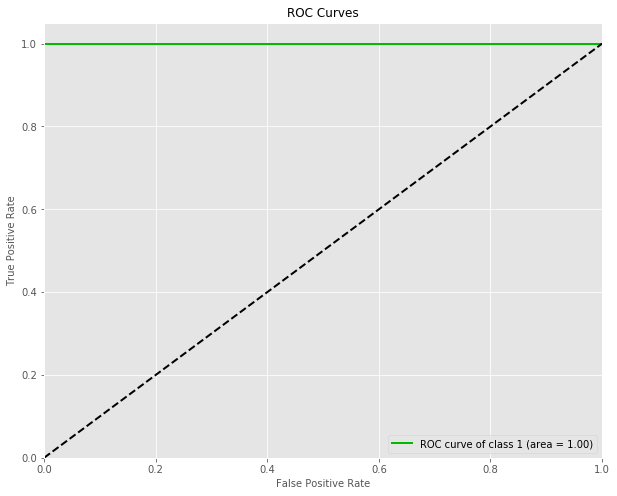

In [65]:
_=skplt.metrics.plot_roc(y_test_rf, scores_rf, 
                         classes_to_plot=[1], plot_micro=False, 
                         plot_macro=False, figsize=(10,8))

#### GradientBoosting Classifier

In [66]:
gb = GradientBoostingClassifier()
gb.fit(X_train, y_train)

GradientBoostingClassifier(criterion='friedman_mse', init=None,
              learning_rate=0.1, loss='deviance', max_depth=3,
              max_features=None, max_leaf_nodes=None,
              min_impurity_decrease=0.0, min_impurity_split=None,
              min_samples_leaf=1, min_samples_split=2,
              min_weight_fraction_leaf=0.0, n_estimators=100,
              n_iter_no_change=None, presort='auto', random_state=None,
              subsample=1.0, tol=0.0001, validation_fraction=0.1,
              verbose=0, warm_start=False)

In [67]:
y_pred_gb = gb.predict(X_test)

In [68]:
precision_gb, recall_gb, accuracy_gb, matrix_gb = util.metric(y_test, y_pred)

In [69]:
# Confusion matrix
matrix_gb

array([[6895,  204],
       [ 942, 7633]])

In [70]:
print("Recall: {}".format(round(recall_gb,2)))
print("Precision: {}".format(round(precision_gb,2)))

Recall: 0.88
Precision: 0.97


In [71]:
# Applying the concept of important features again

In [72]:
important_cols = df_dummy.columns[np.argsort(gb.feature_importances_)[::-1]][:50]
X_imp_gb = df_dummy[important_cols].values
y_imp_gb = df_dummy["y"]

In [73]:
print("Original dataset shape {}".format(dict(Counter(y_imp_gb))))

Original dataset shape {0: 31347, 1: 7885}


In [74]:
X_res_imp_gb, y_res_imp_gb = sm.fit_resample(X_imp_gb, y_imp_gb)

In [75]:
print("Resampled dataset shape {}".format(dict(Counter(y_res_imp_gb))))

Resampled dataset shape {0: 31347, 1: 31347}


In [76]:
X_train_gb2, X_test_gb2, y_train_gb2, y_test_gb2 = train_test_split(X_res_imp_gb, 
                                                                    y_res_imp_gb, 
                                                                    test_size=0.25, 
                                                                    random_state=1)

In [77]:
gb2 = GradientBoostingClassifier()
gb2.fit(X_train_gb2, y_train_gb2)

GradientBoostingClassifier(criterion='friedman_mse', init=None,
              learning_rate=0.1, loss='deviance', max_depth=3,
              max_features=None, max_leaf_nodes=None,
              min_impurity_decrease=0.0, min_impurity_split=None,
              min_samples_leaf=1, min_samples_split=2,
              min_weight_fraction_leaf=0.0, n_estimators=100,
              n_iter_no_change=None, presort='auto', random_state=None,
              subsample=1.0, tol=0.0001, validation_fraction=0.1,
              verbose=0, warm_start=False)

In [78]:
y_pred_gb2 = gb2.predict(X_test_gb2)

In [79]:
precision_gb2, recall_gb2, accuracy_gb2, matrix_gb2 = util.metric(y_test_gb2, y_pred_gb2)

In [80]:
# Confusion matrix
matrix_gb2

array([[7837,    0],
       [   0, 7837]])

In [81]:
print("Recall: {}".format(round(recall_gb2,2)))
print("Precision: {}".format(round(precision_gb2,2)))

Recall: 1.0
Precision: 1.0


In [82]:
#predicted probabilities
scores_gb2 = gb2.predict_proba(X_test_gb2)

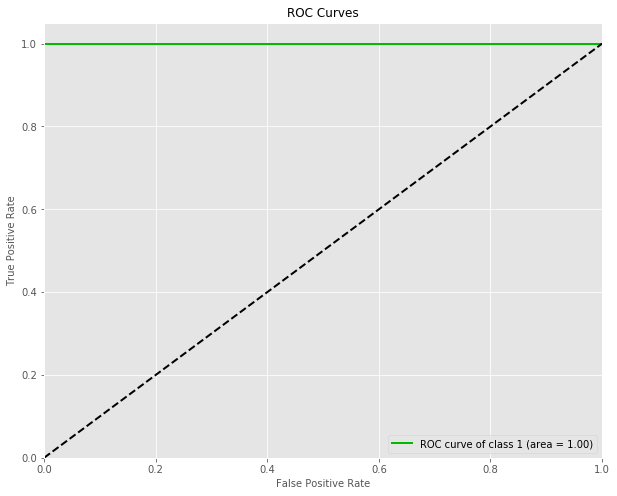

In [83]:
_=skplt.metrics.plot_roc(y_test_gb2, scores_gb2, 
                         classes_to_plot=[1], plot_micro=False, 
                         plot_macro=False, figsize=(10,8))